In [2]:
#ml-1

# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (species)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 5: Train a classifier using LDA-transformed features
lda_classifier = LinearDiscriminantAnalysis()  # LDA can also be used as a classifier
lda_classifier.fit(X_train_lda, y_train)

# Step 6: Make predictions on the test set
y_pred = lda_classifier.predict(X_test_lda)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 8: Predict species for a new flower
new_flower = [[53.1, 0.5, 12.4, 0.2]]  # Example input (features)
new_flower_lda = lda.transform(new_flower)
pred_species = lda_classifier.predict(new_flower_lda)
print(f'Predicted Species: {iris.target_names[pred_species[0]]}')

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Predicted Species: setosa


In [14]:
#2
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Pima Indians Diabetes dataset (downloaded locally from UCI)
pima_data = pd.read_csv('diabetes.csv', header=None,
                        names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                               "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"],
                        skiprows=1)  # Skip the first row if it contains header info

print("Pima Dataset Shape:", pima_data.shape)

# Display first few rows of the dataset
print("\nPima Indians Diabetes Dataset (first 5 rows):")
print(pima_data.head())

print("\nUCI Diabetes Dataset (first 5 rows):")
# print(uci_data.head())



# Function to compute univariate statistics
def univariate_analysis(data):
    stats_df = pd.DataFrame({
        'Feature': data.columns,
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': data.mode().iloc[0],
        'Variance': data.var(),
        'Std_Dev': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurt()
    })
    return stats_df

# Univariate analysis on Pima dataset (excluding target column)
pima_uni_stats = univariate_analysis(pima_data.drop('Outcome', axis=1))
print("Pima Indians Diabetes Dataset - Univariate Analysis")
print(pima_uni_stats)

# Univariate analysis on UCI diabetes dataset (excluding target column)
# uci_uni_stats = univariate_analysis(uci_data.drop('target', axis=1))
# print("\nUCI Diabetes Dataset - Univariate Analysis")
# print(uci_uni_stats)


# Linear Regression on UCI Diabetes dataset
# X_uci = uci_data.drop('target', axis=1)
# y_uci = uci_data['target']

# X_train_uci, X_test_uci, y_train_uci, y_test_uci = train_test_split(X_uci, y_uci, test_size=0.3, random_state=42)

linear_model = LinearRegression()
# linear_model.fit(X_train_uci, y_train_uci)

# y_pred_uci = linear_model.predict(X_test_uci)

# print("\nLinear Regression - UCI Diabetes Dataset")
# print(f"Mean Squared Error: {mean_squared_error(y_test_uci, y_pred_uci):.2f}")
# print(f"R2 Score: {r2_score(y_test_uci, y_pred_uci):.2f}")

# Logistic Regression on Pima Indians Diabetes dataset
X_pima = pima_data.drop('Outcome', axis=1)
y_pima = pima_data['Outcome']

X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_pima, y_train_pima)

y_pred_pima = logistic_model.predict(X_test_pima)

print("\nLogistic Regression - Pima Indians Diabetes Dataset")
print(f"Accuracy: {accuracy_score(y_test_pima, y_pred_pima):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_pima, y_pred_pima)}")
print(f"Classification Report:\n{classification_report(y_test_pima, y_pred_pima)}")

# Multiple Linear Regression on UCI Diabetes dataset
multiple_linear_model = LinearRegression()
# multiple_linear_model.fit(X_train_uci, y_train_uci)

# y_pred_multi = multiple_linear_model.predict(X_test_uci)

# print("\nMultiple Linear Regression - UCI Diabetes Dataset")
# print(f"Mean Squared Error: {mean_squared_error(y_test_uci, y_pred_multi):.2f}")
# print(f"R2 Score: {r2_score(y_test_uci, y_pred_multi):.2f}")

Pima Dataset Shape: (768, 9)

Pima Indians Diabetes Dataset (first 5 rows):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

UCI Diabetes Dataset (first 5 rows):
Pima Indians Diabetes Dataset - Univariate Analysis
                                           Feature        Mean    Median  \
Pregnancies                            Pregnancies    3.84505

In [16]:
#3
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Step 2: Load the dataset (Ensure the file is in the same directory or provide the correct path)
data = pd.read_csv('Social_Network_Ads.csv')

# Step 3: Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in dataset:", data.isnull().sum())

# Step 4: Select Features and Target
X = data[['Age', 'EstimatedSalary']].values  # Features
y = data['Purchased'].values  # Target (0 or 1)

# Step 5: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Feature Scaling (Standardizing Age and Salary for better KNN performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Initialize and Train the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change 'n_neighbors' as needed
knn.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 9: Evaluate the model performance

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate * 100:.2f}%")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing values in dataset: User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Confusion Matrix:
[[69  4]
 [ 4 43]]

Accuracy: 93.33%
Error Rate: 6.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



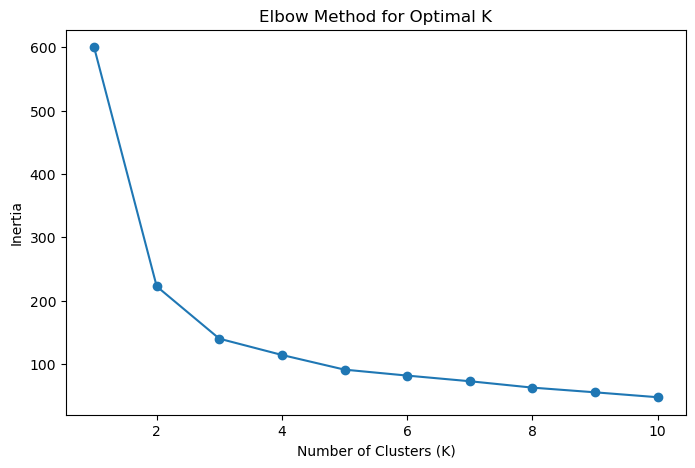

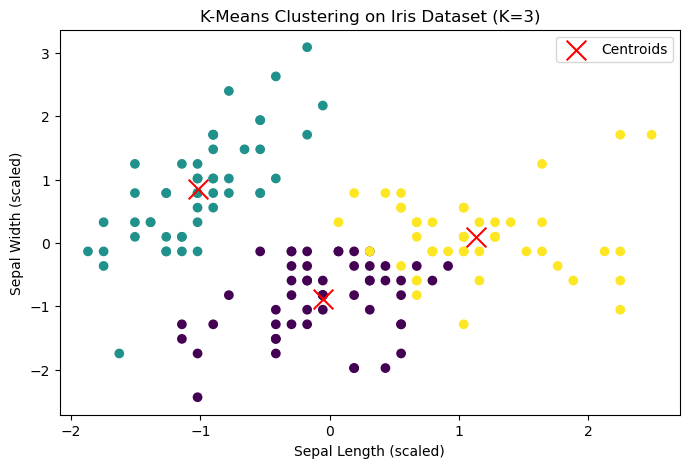

First 5 rows with Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  True Label  
0        1           0  
1        1           0  
2        1           0  
3        1           0  
4        1           0  


In [18]:
#4
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target  # True labels (for reference only, not used in clustering)

# Step 3: Feature Scaling (K-Means is sensitive to feature magnitudes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the Optimal Number of Clusters using Elbow Method
inertia = []  # Store inertia for different K values
K = range(1, 11)  # Try K from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init to suppress warning
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 5: Train K-Means with the optimal number of clusters (let's assume K=3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Set n_init to suppress warning
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 6: Visualize the Clusters (using the first two features for 2D visualization)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Means Clustering on Iris Dataset (K=3)')
plt.legend()
plt.show()

# Step 7: Display Cluster Assignments and Compare with True Labels (Optional)
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = y_kmeans
df['True Label'] = y  # For reference only

print("First 5 rows with Cluster Labels:")
print(df.head())

# !pip install --upgrade threadpoolctl scikit-learn --user

In [22]:
#5
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load data from CSV
df = pd.read_csv('car_evaluation.csv')

# Step 2: Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Step 3: Define features and target variable
X = df.drop('Decision', axis=1)
y = df['Decision']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9739884393063584
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346

Confusion Matrix:
 [[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]


In [24]:
#6
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Maze Environment
maze = np.array([
    [0, 0, 0, 1, 0],  # 1 indicates an obstacle
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 2]   # 2 indicates the goal
])

# Maze parameters
n_rows, n_cols = maze.shape
start_state = (0, 0)
goal_state = (4, 4)

# Step 2: Define Q-Learning Parameters
actions = ['up', 'down', 'left', 'right']
q_table = np.zeros((n_rows, n_cols, len(actions)))  # Q-values for each (state, action)
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.9    # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for epsilon
min_epsilon = 0.1  # Minimum value of epsilon
n_episodes = 1000  # Number of episodes for training

# Helper function to choose an action using epsilon-greedy strategy
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(actions))  # Explore: random action
    else:
        return np.argmax(q_table[state])  # Exploit: best action from Q-table

# Helper function to get the next state based on the action taken
def get_next_state(state, action):
    row, col = state
    
    # Calculate new position based on action
    if action == 0 and row > 0:  # Move up
        row -= 1
    elif action == 1 and row < n_rows - 1:  # Move down
        row += 1
    elif action == 2 and col > 0:  # Move left
        col -= 1
    elif action == 3 and col < n_cols - 1:  # Move right
        col += 1
    
    # Check if the new position is an obstacle
    if maze[row, col] == 1:
        return state  # If it is an obstacle, stay in the current state
    return (row, col)

# Helper function to get the reward for a given state
def get_reward(state):
    if state == goal_state:
        return 10  # High reward for reaching the goal
    elif maze[state] == 1:
        return -10  # Penalty for hitting an obstacle
    else:
        return -1  # Small penalty for each step to encourage faster solutions

# Step 3: Train the Q-Learning Agent
for episode in range(n_episodes):
    state = start_state
    total_reward = 0

    while state != goal_state:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        # Update Q-Table using the Q-Learning formula
        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])
        q_table[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        total_reward += reward

    # Decay epsilon to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

print("\nTraining completed!")

# Step 4: Visualize the Optimal Path Found by the Agent
def visualize_optimal_path():
    path = np.zeros_like(maze, dtype=str)
    path[:] = ' '

    state = start_state
    max_steps = 50  # Set a max limit to prevent infinite loops
    steps = 0

    while state != goal_state and steps < max_steps:
        action = np.argmax(q_table[state])
        next_state = get_next_state(state, action)

        # If the agent enters a loop or gets stuck, exit
        if path[state] == 'A':  # If already visited
            print("\nNo route found. The agent is stuck in a loop.")
            return

        path[state] = 'A'  # Mark the agent's path
        state = next_state
        steps += 1
        print(path)

    # Check if goal was reached
    if state == goal_state:
        path[goal_state] = 'G'  # Mark the goal
        print("\nOptimal Path Found by the Agent:")
        print(path)
    else:
        print("\nNo route found. The agent did not reach the goal.")

visualize_optimal_path()


Episode 100: Total Reward = -2
Episode 200: Total Reward = 1
Episode 300: Total Reward = 1
Episode 400: Total Reward = 3
Episode 500: Total Reward = 3
Episode 600: Total Reward = 2
Episode 700: Total Reward = 2
Episode 800: Total Reward = 2
Episode 900: Total Reward = 3
Episode 1000: Total Reward = 2

Training completed!
[['A' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']]
[['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']]
[['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']]
[['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']]
[['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' 'A' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ']]
[['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ']
 ['A' 'A' ' ' ' ' ' ']
 [' '